In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [5]:
image = plt.imread('ladybug.jpg')
image = image[::10, ::10, :]
image.shape

(77, 103, 3)

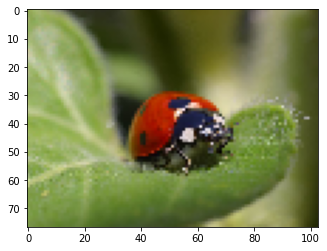

In [6]:
plt.imshow(image)

In [9]:
color_tbl = image.reshape(-1, 3)
pd.DataFrame(color_tbl, columns = ['Red', 'Green', 'Blue'])

,Red,Green,Blue
0,144,168,84
1,154,173,91
2,159,181,106
3,165,182,112
4,163,178,113
...,...,...,...
7926,64,68,18
7927,53,56,11
7928,46,51,10
7929,37,43,5


In [10]:
km = KMeans()
km.fit(color_tbl)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
km.cluster_centers_.astype(int)

array([[121, 141,  71],
       [ 73,  79,  34],
       [172, 182, 126],
       [146, 162,  98],
       [160,  38,   4],
       [ 96, 112,  48],
       [204, 202, 168],
       [ 40,  42,  19]])

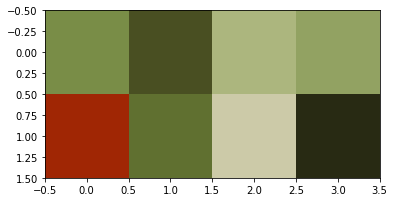

In [16]:
plt.imshow(km.cluster_centers_.reshape(2,4,3).astype(int))

In [17]:
km.labels_

array([3, 3, 3, ..., 7, 7, 7], dtype=int32)

In [18]:
km.cluster_centers_[[0, 0, 7, 5, 7]]

array([[121.26073851, 141.92916353,  71.95478523],
       [121.26073851, 141.92916353,  71.95478523],
       [ 40.97171717,  42.88484848,  19.31818182],
       [ 96.18486056, 112.57928287,  48.5314741 ],
       [ 40.97171717,  42.88484848,  19.31818182]])

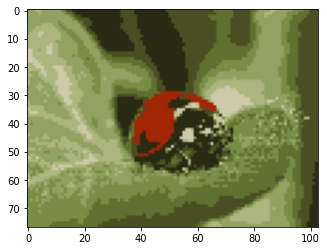

In [23]:
color8 = km.cluster_centers_.astype(int)[km.labels_].reshape(image.shape)
plt.imshow(color8)

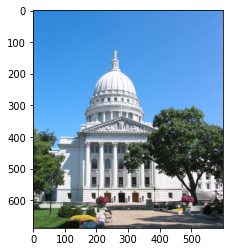

In [24]:
img = plt.imread("capital.jpg")
plt.imshow(img)

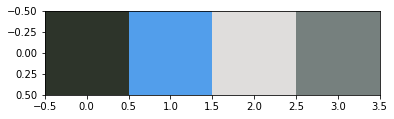

In [27]:
km = KMeans(n_clusters=4)
km.fit(img.reshape(-1,3))
plt.imshow(km.cluster_centers_.reshape(1,4,3).astype(int))

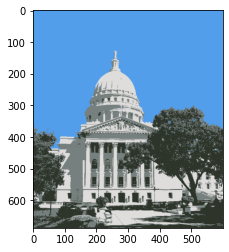

In [28]:
img2 = km.cluster_centers_.astype(int)[km.labels_].reshape(img.shape)
plt.imshow(img2)

In [29]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

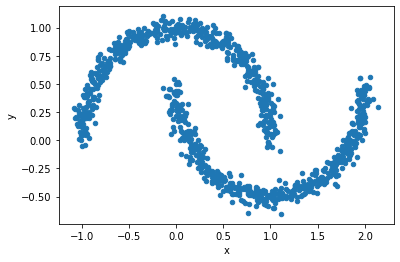

In [30]:
xy, _ = datasets.make_moons(1000, noise = 0.05)
df = pd.DataFrame(xy, columns = ['x', 'y'])
df.plot.scatter(x = 0, y =1)

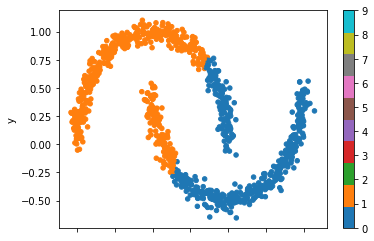

In [33]:
km = KMeans(2)
categories = km.fit_predict(df)
df.plot.scatter(x = 0, y = 1, c = categories, cmap = 'tab10', vmin = 0, vmax = 9)

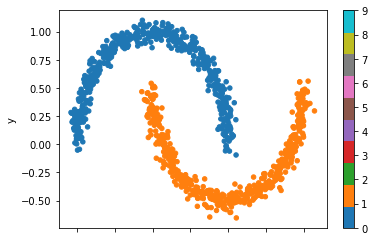

In [35]:
ac = AgglomerativeClustering(2, linkage = 'single')
categories = ac.fit_predict(df)
df.plot.scatter(x = 0, y = 1, c = categories, cmap = 'tab10', vmin = 0, vmax = 9)

In [44]:
x, y = datasets.make_blobs(500, centers = [[1, 1], [2.5, 1.5], [10, 5], [10, 8], [7.5, 7]], cluster_std = 0.3)
df = pd.DataFrame(x, columns = ['x', 'y'])
df.head()

,x,y
0,1.174599,0.987262
1,9.609334,5.549723
2,2.617423,1.473726
3,2.526510,0.904282
4,2.576393,1.473393


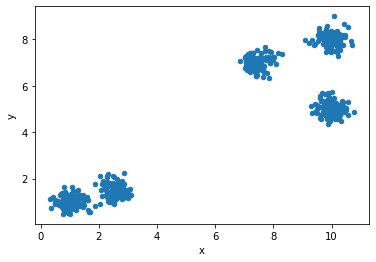

In [45]:
df.plot.scatter(x = 'x', y = 'y')

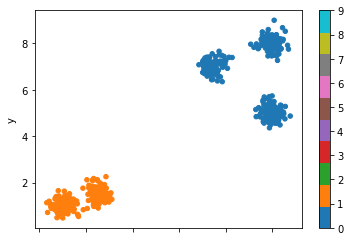

In [46]:
ac = AgglomerativeClustering(n_clusters = 2)
categories = ac.fit_predict(df)
df.plot.scatter(x = 0, y = 1, c = categories, cmap = 'tab10', vmin = 0, vmax = 9)

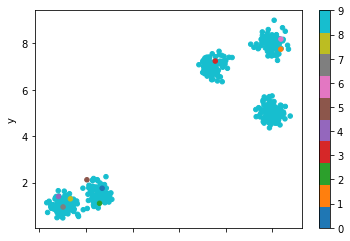

In [48]:
ac = AgglomerativeClustering(n_clusters = None, distance_threshold = 0)
categories = ac.fit_predict(df)
df.plot.scatter(x = 0, y = 1, c = categories, cmap = 'tab10', vmin = 0, vmax = 9)

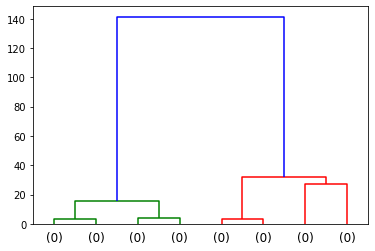

In [61]:
from scipy.cluster.hierarchy import dendrogram
ac.children_
ac.distances_
labels = np.zeros((len(ac.children_), 1))
d = np.hstack((ac.children_, ac.distances_.reshape(-1,1), labels))
dendrogram(d, truncate_mode = 'level', p = 2)
None

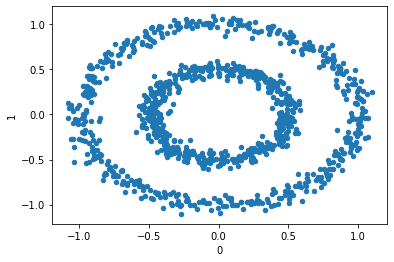

In [62]:
xy, _ = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)
df = pd.DataFrame(np.vstack(xy))
df.plot.scatter(x=0, y=1)

In [63]:
clusters = AgglomerativeClustering().fit_predict(xy)

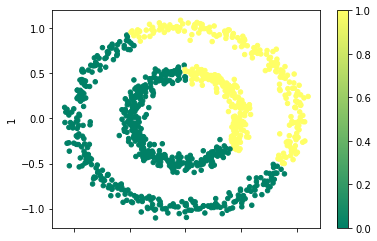

In [64]:
clusters = AgglomerativeClustering().fit_predict(xy)
df.plot.scatter(x=0, y=1, c=clusters, cmap="summer")

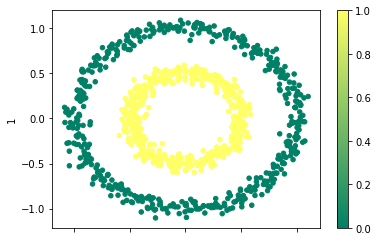

In [66]:
clusters = AgglomerativeClustering(linkage = 'single').fit_predict(xy)
df.plot.scatter(x=0, y=1, c=clusters, cmap="summer")

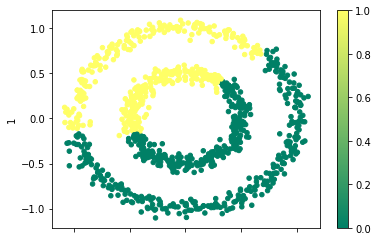

In [67]:
clusters = AgglomerativeClustering(linkage = 'average').fit_predict(xy)
df.plot.scatter(x=0, y=1, c=clusters, cmap="summer")

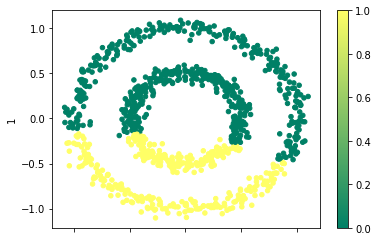

In [68]:
clusters = AgglomerativeClustering(linkage = 'complete').fit_predict(xy)
df.plot.scatter(x=0, y=1, c=clusters, cmap="summer")